In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Recurrence and transience of $d$-dimensional random walks

## The 2-dimensional random walk
The following code simulates a 2-dimensional random walk with different probabilities to go N,S,E,W. You can play with these parameters and check that the Simple Random Walk (SRW) is quite different.

In [2]:
# probabilities for your 
# 2D random walk

[p_N,p_S,p_E,p_W] = [1/4,1/4,1/4,1/4] # = [1/4,1/4,1/4,1/4] for the SRW

# number of steps of the walk
n_steps = 100000

# starting point
start = [0,0]

# run the walk
x = [start[0]]
y = [start[1]]
counter = 1
while counter < n_steps:
    U = np.random.rand()
    if 0 < U <= p_N:
        # going north
        x.append(x[-1] + 1) 
        y.append(y[-1])
    elif p_N < U <= p_N + p_S:
        # going south
        x.append(x[-1] - 1) 
        y.append(y[-1])
    elif p_N + p_S < U <= p_N + p_S+ p_E:
        # going east
        x.append(x[-1])
        y.append(y[-1]+1)
    else:
        # going west
        x.append(x[-1])
        y.append(y[-1]-1)
    counter += 1


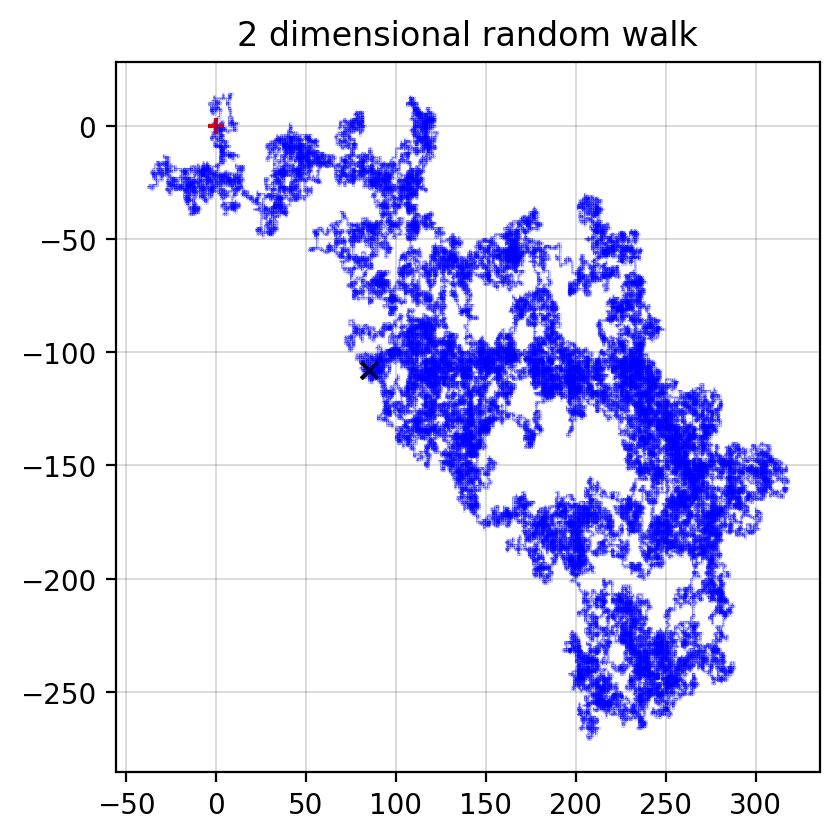

In [3]:
# Plot the 2D-path
fig = plt.figure(figsize=(4,4),dpi=200)
ax = fig.add_subplot(111)
plt.grid(color='black', linestyle='-', linewidth=0.1)
ax.scatter(y, x,c='blue',alpha=0.25,s=0.05);
ax.plot(y, x,c='blue',alpha=0.5,lw=0.25,ls='-');
ax.scatter(y[0], x[0],c='red', marker='+')
ax.scatter(y[-1], x[-1],c='black', marker='x')
plt.title('2 dimensional random walk')
plt.tight_layout(pad=0)

## The 3-dimensional random walk

In [4]:
# 3D random walk 

# The walk is always transient
# in 3D except if transitions 
# probability are such that the 
# walk is in fact 
# only in 2D or 1D 
### Thus, we only look at SRW in 3D ###

# number of steps
n_steps = 10**3

# starting point
start = [0,0,0]

# run the walk
x = [start[0]]
y = [start[1]]
z = [start[2]]

counter = 1
while counter < n_steps:
    # choose a random direction  
    vec = np.random.randint(1,4)
    orient = np.random.randint(0,2)*2-1 ## = to -1 or 1 with proba 1/2
    if vec ==1:
        x.append(x[-1]+orient)
        y.append(y[-1])
        z.append(z[-1])
    if vec ==2:
        x.append(x[-1])
        y.append(y[-1]+orient)
        z.append(z[-1])
    else:
        x.append(x[-1])
        y.append(y[-1])
        z.append(z[-1]+orient)
    counter += 1

Text(0.5, 0.92, '3 dimensional random walk')

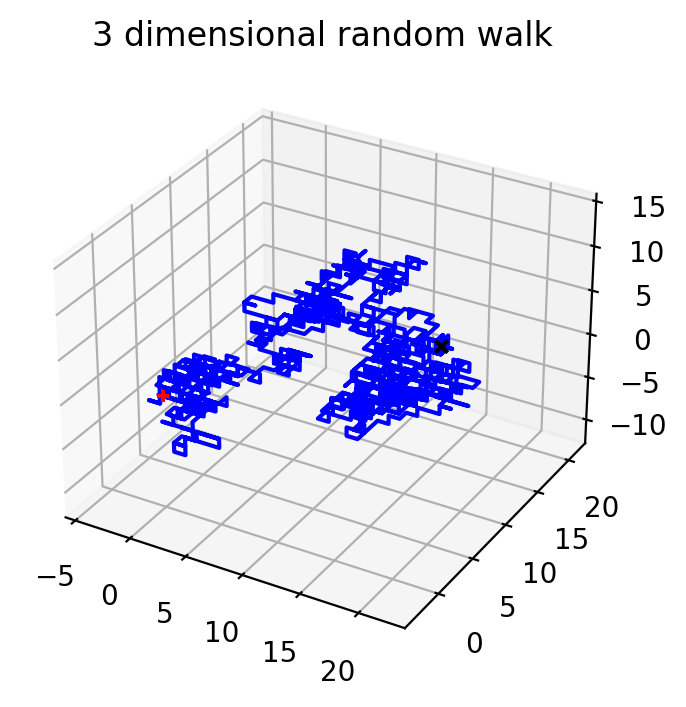

In [5]:
# Plotting the simulations
fig = plt.figure(figsize=(4,4),dpi=200)
ax = plt.axes(projection='3d')
ax.plot3D(z, y, x, 'blue')
ax.scatter(z[0],y[0], x[0],c='red', marker='+')
ax.scatter(z[-1],y[-1], x[-1],c='black', marker='x')
plt.title('3 dimensional random walk')

Hereafter is a function which allows you to compute the number of visits to zero for the three dimensional random walks.

In [6]:
def visits_to_zero_3d(n_simulations,n_steps):
    hist = {1:0} # Initialize the histogram as a dictionnary
    for i in range(n_simulations):
        # number of steps

        # starting point
        start = [0,0,0]

        # run the walk
        x = [start[0]]
        y = [start[1]]
        z = [start[2]]
        zero_count = 1 #you start at one so get +1 for free
        for j in range(n_steps):
            # choose a random direction  
            vec = np.random.randint(1,4)
            orient = np.random.randint(0,2)*2-1 ## = to -1 or 1 with proba 1/2
            if vec ==1: #choose a direction and then an orientation
                x.append(x[-1]+orient)
                y.append(y[-1])
                z.append(z[-1])
            if vec ==2:
                x.append(x[-1])
                y.append(y[-1]+orient)
                z.append(z[-1])
            else:
                x.append(x[-1])
                y.append(y[-1])
                z.append(z[-1]+orient)  
            zero_count += (x[-1]==y[-1]==z[-1]==0)
        if zero_count in hist:
                hist[zero_count] += 1
        else:
                hist[zero_count] = 1
    return hist

{1: 67, 3: 8, 7: 1, 2: 19, 4: 4, 5: 1}
the probability of returning at some time t>0 to zero p_0 is approximately  0.33


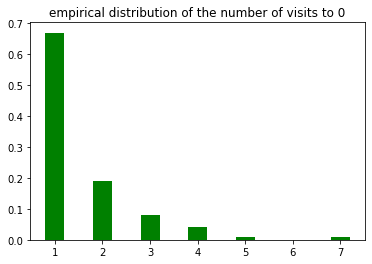

In [7]:
# Plotting the result of the function

n_simulations =10**2
n_steps=10**3

# Get the histogram
# and renormalize the probability distribution
hist = visits_to_zero_3d(n_simulations,n_steps)
print(hist)
total = sum(hist.values())
factor = 1/total

normalized_hist =  {key:value*factor for key,value in hist.items()}

return_proba = (n_simulations - hist[1])/n_simulations
print("the probability of returning at some time t>0 to zero p_0 is approximately ", return_proba)
plt.title('empirical distribution of the number of visits to 0')
plt.bar(list(normalized_hist.keys()), normalized_hist.values(), color='g', width=0.4)
plt.show()

It was shown a bit miraculously in 1992 by Borwein and Zucker that the mean of the expected number of returns to 0 (that we write $N_0$) for the SRW in 3 dimensions could be also be computed exactly. The formula is as follows:
\begin{align*}
        \mathbb{E}(N_0) = \frac{\sqrt3 -1}{32 \pi^3}\left[\Gamma(\frac{1}{24})\Gamma(\frac{11}{24})\right]^2 \simeq 1.516386...
\end{align*}
Where $\Gamma$ is the Euler gamma function.
This formula is very surprising and also very hard to prove and is only given here because it is remarkable. Of course, you do not have to remember it. However it allows to check if the empirical probability of returning to 0 is close to the theoretical one. Since we know from the lectures that 
\begin{align*}
    \mathbb{E}(N_0) = \frac{1}{1-p_0}.
\end{align*}
And thus that the return probability to 0 starting from 0, $p_0$, has approximate value
\begin{equation*}
    p_0 = 1-\frac{1}{\mathbb{E}(N_0)} \simeq  1-\frac{1}{1.516386} \simeq 0.34.
\end{equation*}

For 
n_simulations =10^3
n_steps=10^4, I obtained with the above program $p^{exp}_0 \simeq 0.339$ which is in accordance with the theory.

[1, 3, 7, 2, 4, 5]


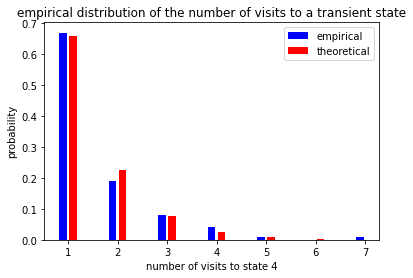

In [8]:
# Comparing the theory and the simulations
L = len(normalized_hist.keys())

# True probability of return
f_0 = 1-1/1.5168
true_hist = {}
for i in range(L):
    true_hist[i+1] = (1-f_0)*f_0**(i)

# Comparing the two histograms
plt.title('empirical distribution of the number of visits to a transient state')
plt.xlabel('number of visits to state 4')
plt.ylabel('probability')
print(list(normalized_hist.keys()))
plt.bar([x-0.1 for x in list(normalized_hist.keys())], normalized_hist.values(), color='b', width=0.15, label = 'empirical')
plt.bar([x+0.1 for x in list(true_hist.keys())], true_hist.values(), color='r', width=0.15, label="theoretical")
plt.legend()
plt.show()

## Question 5 - 3. Playing with the transition probabilities in a Markov chain
### Can you make the sate '4' or '6' from Problem 1 - Week 2  a bit ""less"" transient?
We will be using the functions from the previous notebook.

In [9]:
## Defining a Markov Chain

class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of 
            state in the Markov Chain.
 
        states: 1-D array 
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in 
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
         self.states, 
         p=self.transition_matrix[self.index_dict[current_state], :]
        )
 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

Some useful functions explained and coded below

In [10]:
def run_simulations_markov_chain(markov_chain, nrealizations, nsteps, initial_state):
    sim_arr = np.zeros((nsteps, nrealizations))

    #Running many realizations
    for r in range(nrealizations):
        simulation= markov_chain.generate_states(current_state=initial_state, 
                                              no=nsteps)  
        sim_arr[:, r] = np.array(simulation)
    return sim_arr

def state_statistics(markov_chain, nrealizations, nsteps, initial_state):
    # Return the empirical probability of return and
    # the number of visits of some state 
    # starting from that state. 
    # This is only interesting when the state is transient.
    
    
    # Get the simulation results
    sim_arr = run_simulations_markov_chain(markov_chain, nrealizations, nsteps, initial_state)
    #Here we "call" i the transient initial_state
    N_i = 0
    f_i = 0

    hist = {1:0} # Initialize the histogram as a dictionnary
    sim_arr_transpose = np.transpose(sim_arr)
    for x in sim_arr_transpose:
        occurences_i = np.count_nonzero(x == int(initial_state))# If occurences is 0 then the state is not re-visited
        N_i = N_i + 1 + occurences_i # Add 1 to take into account the intial step X_0 = i
        does_return = (occurences_i>0) 
        f_i = f_i + does_return
        
        if 1+occurences_i in hist:
            hist[1+occurences_i] += 1
        else:
            hist[1+occurences_i] = 1
    return [N_i/nrealizations, f_i/nrealizations,hist]
        

Running the smulation

In [17]:
#Initialising our Markov chain

# We first copy the transition matrix from Problem 1 - Week 2
# and give some modifications to it

M_1 =[[1/2, 1/2, 0, 0, 0, 0], 
    [1/2, 1/2, 0, 0, 0, 0],
    [0, 0, 1/2, 0, 1/2, 0],
    [1/4, 1/4, 0, 0, 1/4, 1/4],
    [0, 0, 1/2, 0, 1/2, 0],
    [0, 1/3, 0, 1/3, 1/3, 0]]

M_2 =  [[1/2, 1/2, 0, 0, 0, 0], 
       [1/2, 1/2, 0, 0, 0, 0],
       [0, 0, 1/2, 0, 1/2, 0],
      [1/4, 1/4, 0, 0, 1/4-0.15, 1/4+0.15],
      [0, 0, 1/2, 0, 1/2, 0],
       [0, 1/3, 0, 1/3, 1/3, 0]]
        
M_3 =  [[1/2, 1/2, 0, 0, 0, 0], 
       [1/2, 1/2, 0, 0, 0, 0],
        [0, 0, 1/2, 0, 1/2, 0],
       [1/4, 1/4, 0, 0, 1/4-0.15, 1/4+0.15],
      [0, 0, 1/2-0.2, 0, 1/2+0.2, 0],
      [0, 1/3, 0, 1/3+0.15, 1/3-0.15, 0]]
# Above is the original matrix but you can change it a bit 
# Try to make the transient states "less" transient


In [20]:
# Compute the probability of returning 
# at some point to state i when starting 
# from state i.

# Choose a transient state
initial_state ='4' # in {'4','6'}
nrealizations = 1000
nsteps = 20

# Get its statistics

#For the first matrix
markov_chain_1 = MarkovChain(transition_matrix=M_1,
                            states=['1', '2', '3', '4', '5', '6'])#Name your states here
statistics_1 = state_statistics(markov_chain_1, nrealizations, nsteps, initial_state)

#For the second matrix
markov_chain_2 = MarkovChain(transition_matrix=M_2,
                            states=['1', '2', '3', '4', '5', '6'])#Name your states here
statistics_2 = state_statistics(markov_chain_2, nrealizations, nsteps, initial_state)

#For the third matrix
markov_chain_1 = MarkovChain(transition_matrix=M_3,
                            states=['1', '2', '3', '4', '5', '6'])#Name your states here
statistics_3 = state_statistics(markov_chain_2, nrealizations, nsteps, initial_state)

In [21]:
# Print the results for the different matrices 

print("For the first matrix :")
for e in M_1:
    print(e)
print("We have :")
print("The empirical average number of visits to " + initial_state + 
      " starting from " + initial_state + " is", statistics_1[0])
print("The empirical probability of returning to " + initial_state + 
      " starting from " + initial_state + " is", statistics_1[1])
print("---------------------------------------------------------------------")
print("---------------------------------------------------------------------")


print("For the second matrix :")
for e in M_2:
    print(e)
print("We have :")
print("The empirical average number of visits to " + initial_state + 
      " starting from " + initial_state + " is", statistics_2[0])
print("The empirical probability of returning to " + initial_state + 
      " starting from " + initial_state + " is", statistics_2[1])
print("---------------------------------------------------------------------")
print("---------------------------------------------------------------------")




print("For the third matrix :")
for e in M_3:
    print(e)
print("We have :")
print("The empirical average number of visits to " + initial_state + 
      " starting from " + initial_state + " is", statistics_3[0])
print("The empirical probability of returning to " + initial_state + 
      " starting from " + initial_state + " is", statistics_3[1])

For the first matrix :
[0.5, 0.5, 0, 0, 0, 0]
[0.5, 0.5, 0, 0, 0, 0]
[0, 0, 0.5, 0, 0.5, 0]
[0.25, 0.25, 0, 0, 0.25, 0.25]
[0, 0, 0.5, 0, 0.5, 0]
[0, 0.3333333333333333, 0, 0.3333333333333333, 0.3333333333333333, 0]
We have :
The empirical average number of visits to 4 starting from 4 is 1.091
The empirical probability of returning to 4 starting from 4 is 0.084
---------------------------------------------------------------------
---------------------------------------------------------------------
For the second matrix :
[0.5, 0.5, 0, 0, 0, 0]
[0.5, 0.5, 0, 0, 0, 0]
[0, 0, 0.5, 0, 0.5, 0]
[0.25, 0.25, 0, 0, 0.1, 0.4]
[0, 0, 0.5, 0, 0.5, 0]
[0, 0.3333333333333333, 0, 0.3333333333333333, 0.3333333333333333, 0]
We have :
The empirical average number of visits to 4 starting from 4 is 1.166
The empirical probability of returning to 4 starting from 4 is 0.147
---------------------------------------------------------------------
---------------------------------------------------------------